In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("data_w_htags_8897.csv")

In [4]:
data

,Unnamed: 0,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,updated_text
0,0,negative,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,it s realli aggress to blast obnoxi enterta...
1,1,negative,1.0,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,and it s a realli big bad thing about it
2,2,negative,1.0,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,serious would pay a flight for seat that ...
3,3,positive,1.0,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",it was amaz and arriv an hour ear you re t...
4,4,positive,1.0,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,i red heart ️ pretti graphic so much bette...
...,...,...,...,...,...,...,...,...,...,...,...,...
8892,8892,positive,1.0,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,thank he is
8893,8893,negative,1.0,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,thank for noth on get unit state out of ...
8894,8894,negative,1.0,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,my flight was cancel light leav tomorrow mo...
8895,8895,negative,1.0,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,leav over minut late flight no warn or co...


In [5]:
data.airline_sentiment.value_counts()

negative    7382
positive    1515
Name: airline_sentiment, dtype: int64

In [6]:
X = data.updated_text
y = data.airline_sentiment
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(pd.array(X).reshape(-1,1),y)

In [7]:
y_under.value_counts()

negative    1515
positive    1515
Name: airline_sentiment, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_cv1 = tfidf1.fit_transform(X_train.ravel())
X_test_cv1  = tfidf1.transform(X_test.ravel())

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_cv2 = tfidf2.fit_transform(X_train.ravel())
X_test_cv2  = tfidf2.transform(X_test.ravel())

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()

In [ ]:
# Kelimelere ayırarak oluşturulan DataFrame
lr1.fit(X_train_cv1, y_train)
y_pred_cv1 = lr1.predict(X_test_cv1)

In [ ]:
# 2'li N-Gram yöntemi kullanılarak oluşturulan DataFrame
lr2 = LogisticRegression()
lr2.fit(X_train_cv2, y_train)
y_pred_cv2 = lr2.predict(X_test_cv2)

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='negative', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='negative', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='negative', zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    cm_results = pd.DataFrame({"Precision":[precision],
                             "Recall":[recall],
                             "F1 Score":[f1],
                             "Accuracy":[accuracy]})
    return cm_results

In [ ]:
X_train_cv1.shape

In [ ]:
# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)
train_acc = accuracy_score(y_train,lr1.predict(X_train_cv1))
cm1.insert(0,"Model","LR(Word)")
cm1["Accuracy (Train)"]=train_acc
cm1

In [ ]:
# İkinci modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)
cm2.insert(0,"Model","LR(N-Gram)")
cm2["Accuracy (Train)"]=accuracy_score(y_train,lr2.predict(X_train_cv2))
cm2

In [ ]:
# İlk olarak MultinomialNB algoritmasıyla modellerimizi eğitelim
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [ ]:
# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)
cm3.insert(0,"Model","MultinomialNB(Word)")
cm3["Accuracy (Train)"]=accuracy_score(y_train,mnb1.predict(X_train_cv1))
cm3

In [ ]:
# MultinomialNB & 2'li N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)
cm4.insert(0,"Model","MultinomialNB(N-Gram)")
cm4["Accuracy (Train)"]=accuracy_score(y_train,mnb2.predict(X_train_cv2))
cm4

In [ ]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

In [ ]:
# BernoulliNB & Kelime
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)
cm5.insert(0,"Model","BernoulliNB(Word)")
cm5["Accuracy (Train)"]=accuracy_score(y_train,bnb1.predict(X_train_cv1))
cm5

In [ ]:
# BernoulliNB & 2'li N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)
cm6.insert(0,"Model","BernoulliNB(N-Gram)")
cm6["Accuracy (Train)"]=accuracy_score(y_train,bnb2.predict(X_train_cv2))
cm6

In [ ]:
#SVm
from sklearn import model_selection, naive_bayes, svm
svm1 = svm.SVC(probability=True)
svm1.fit(X_train_cv1, y_train)

svm2 = svm.SVC(probability=True)
svm2.fit(X_train_cv2, y_train)

y_pred_cv1_svm = svm1.predict(X_test_cv1)
y_pred_cv2_svm = svm2.predict(X_test_cv2)

In [ ]:
# svm & Kelime
cm7 = conf_matrix(y_test, y_pred_cv1_svm)
cm7.insert(0,"Model","SVM(Word)")
cm7["Accuracy (Train)"]=accuracy_score(y_train,svm1.predict(X_train_cv1))
cm7

In [ ]:
# svm & 2'li N-grams
cm8 = conf_matrix(y_test, y_pred_cv2_svm)
cm8.insert(0,"Model","SVM(N-Gram)")
cm8["Accuracy (Train)"]=accuracy_score(y_train,svm2.predict(X_train_cv2))
cm8

In [12]:
from sklearn.svm import LinearSVC, SVC
from nltk.classify.scikitlearn import SklearnClassifier
svc1 = LinearSVC(dual=False)
svc1.fit(X_train_cv1, y_train)

svc2 = LinearSVC(dual=False)
svc2.fit(X_train_cv2, y_train)

y_pred_cv1_svc = svc1.predict(X_test_cv1)
y_pred_cv2_svc = svc2.predict(X_test_cv2)

,Model,Precision,Recall,F1 Score,Accuracy,Accuracy (Train)
0,SVC(Word),0.884696,0.90364,0.894068,0.889989,0.995757


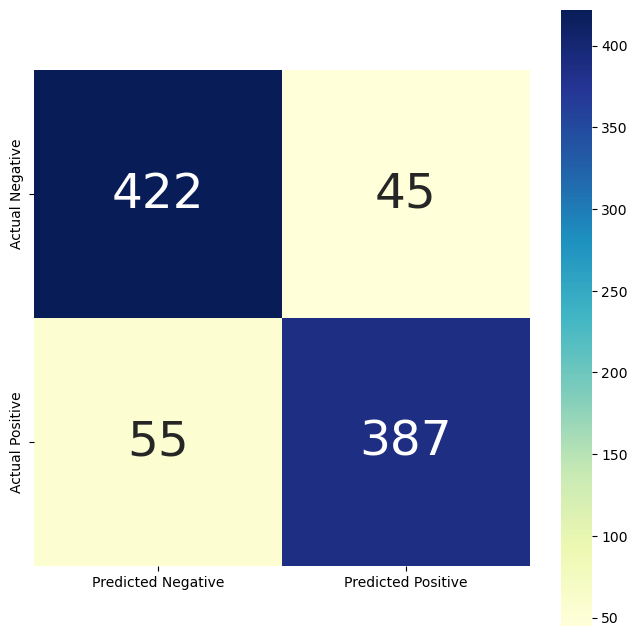

In [13]:
# svc & Kelime
cm9 = conf_matrix(y_test, y_pred_cv1_svc)
cm9.insert(0,"Model","SVC(Word)")
cm9["Accuracy (Train)"]=accuracy_score(y_train,svc1.predict(X_train_cv1))
cm9

,Model,Precision,Recall,F1 Score,Accuracy,Accuracy (Train)
0,SVC(N-Gram),0.90625,0.931478,0.918691,0.915292,0.998586


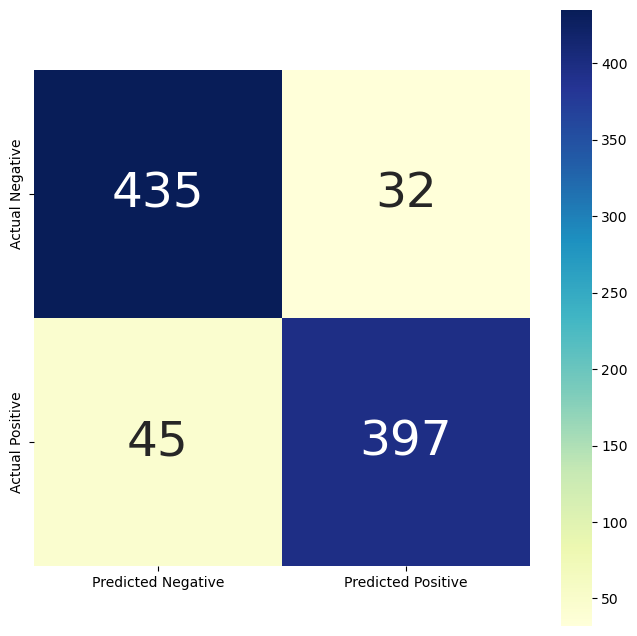

In [14]:
# svc & 2'li N-grams
cm10 = conf_matrix(y_test, y_pred_cv2_svc)
cm10.insert(0,"Model","SVC(N-Gram)")
cm10["Accuracy (Train)"]=accuracy_score(y_train,svc2.predict(X_train_cv2))
cm10

In [ ]:
#random forest classifier  & word
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()
rfc1.fit(X_train_cv1, y_train)

rfc2 = RandomForestClassifier()
rfc2.fit(X_train_cv2, y_train)

y_pred_cv1_rfc = rfc1.predict(X_test_cv1)
y_pred_cv2_rfc = rfc2.predict(X_test_cv2)

In [ ]:
#rfc & word
cm11 = conf_matrix(y_test,y_pred_cv1_rfc)
cm11.insert(0,"Model","RFC(Word)")
cm11["Accuracy (Train)"]=accuracy_score(y_train,rfc1.predict(X_train_cv1))
cm11

In [ ]:
# rfc & n-gram
cm12 = conf_matrix(y_test,y_pred_cv2_rfc)
cm12.insert(0,"Model","RFC(N-Gram)")
cm12["Accuracy (Train)"]=accuracy_score(y_train,rfc2.predict(X_train_cv2))
cm12

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(X_train_cv1.toarray(), y_train)

gnb2 = GaussianNB()
gnb2.fit(X_train_cv2.toarray(), y_train)

y_pred_cv1_gnb = gnb1.predict(X_test_cv1.toarray())
y_pred_cv2_gnb = gnb2.predict(X_test_cv2.toarray())

In [ ]:
#gnb & word
cm13 = conf_matrix(y_test,y_pred_cv1_gnb)
cm13.insert(0,"Model","GNB(Word)")
cm13["Accuracy (Train)"]=accuracy_score(y_train,gnb1.predict(X_train_cv1.toarray()))
cm13

In [ ]:
#gnb & 2'li N-Grams
cm14 =conf_matrix(y_test,y_pred_cv2_gnb)
cm14.insert(0,"Model","GNB(N-Gram)")
cm14["Accuracy (Train)"]=accuracy_score(y_train,gnb2.predict(X_train_cv2.toarray()))
cm14

In [ ]:
from sklearn.linear_model import Perceptron
pct1 = Perceptron()
pct1.fit(X_train_cv1,y_train)

pct2 = Perceptron()
pct2.fit(X_train_cv2,y_train)

y_pred_cv1_pct = pct1.predict(X_test_cv1)
y_pred_cv2_pct = pct2.predict(X_test_cv2)

In [ ]:
cm15 = conf_matrix(y_test,y_pred_cv1_pct)
cm15.insert(0,"Model","Perceptron(Word)")
cm15["Accuracy (Train)"]=accuracy_score(y_train,pct1.predict(X_train_cv1))
cm15

In [ ]:
cm16 = conf_matrix(y_test,y_pred_cv2_pct)
cm16.insert(0,"Model","Perceptron(N-Gram)")
cm16["Accuracy (Train)"]=accuracy_score(y_train,pct2.predict(X_train_cv2))
cm16

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train_cv1,y_train)

dtc2 = DecisionTreeClassifier()
dtc2.fit(X_train_cv2,y_train)

y_pred_cv1_dtc = dtc1.predict(X_test_cv1)
y_pred_cv2_dtc = dtc2.predict(X_test_cv2)

In [ ]:
cm17 = conf_matrix(y_test,y_pred_cv1_dtc)
cm17.insert(0,"Model","DecisionTree(Word)")
cm17["Accuracy (Train)"]=accuracy_score(y_train,dtc1.predict(X_train_cv1))
cm17

In [ ]:
cm18 =conf_matrix(y_test,y_pred_cv2_dtc)
cm18.insert(0,"Model","DecisionTree(N-Gram)")
cm18["Accuracy (Train)"]=accuracy_score(y_train,dtc2.predict(X_train_cv2))
cm18

In [ ]:
from xgboost import XGBClassifier
y_train_0_1 = y_train.map(lambda x: x.replace("negative","0").replace("positive","1")).apply(int)
y_test_0_1 = y_test.map(lambda x: x.replace("negative","0").replace("positive","1")).apply(int)
xgb1 = XGBClassifier()
xgb1.fit(X_train_cv1,y_train_0_1)

xgb2 = XGBClassifier()
xgb2.fit(X_train_cv2,y_train_0_1)

y_pred_cv1_xgb = xgb1.predict(X_test_cv1)
y_pred_cv2_xgb = xgb2.predict(X_test_cv2)

In [ ]:
len(y_pred_cv1_xgb)

In [ ]:
def conf_matrix_xgb(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label=0, zero_division=1)
    recall = recall_score(actual, predicted, pos_label=0, zero_division=1)
    f1 = f1_score(actual, predicted, pos_label=0, zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    cm_results = pd.DataFrame({"Precision":[precision],
                             "Recall":[recall],
                             "F1 Score":[f1],
                             "Accuracy":[accuracy]})
    return cm_results

In [ ]:
cm19 = conf_matrix_xgb(y_test_0_1, y_pred_cv1_xgb)
cm19.insert(0,"Model","XGBoost(Word)")
cm19["Accuracy (Train)"]=accuracy_score(y_train_0_1,xgb1.predict(X_train_cv1))
cm19

In [ ]:
cm20 = conf_matrix_xgb(y_test_0_1, y_pred_cv2_xgb)
cm20.insert(0,"Model","XGBoost(N-Gram)")
cm20["Accuracy (Train)"]=accuracy_score(y_train_0_1,xgb2.predict(X_train_cv2))
cm20

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc1 = AdaBoostClassifier()
abc1.fit(X_train_cv1,y_train)

abc2 = AdaBoostClassifier()
abc2.fit(X_train_cv2,y_train)

y_pred_cv1_abc = abc1.predict(X_test_cv1)
y_pred_cv2_abc = abc2.predict(X_test_cv2)

In [ ]:
cm21 = conf_matrix(y_test,y_pred_cv1_abc)
cm21.insert(0,"Model","AdaBoost(Word)")
cm21["Accuracy (Train)"]=accuracy_score(y_train,abc1.predict(X_train_cv1))
cm21

In [ ]:
cm22 = conf_matrix(y_test,y_pred_cv2_abc)
cm22.insert(0,"Model","AdaBoost(N-Gram)")
cm22["Accuracy (Train)"]=accuracy_score(y_train,abc2.predict(X_train_cv2))
cm22

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc1 = BaggingClassifier()
bc1.fit(X_train_cv1,y_train)

bc2 = BaggingClassifier()
bc2.fit(X_train_cv2,y_train)

y_pred_cv1_bc = bc1.predict(X_test_cv1)
y_pred_cv2_bc = bc2.predict(X_test_cv2)

In [ ]:
cm23 = conf_matrix(y_test,y_pred_cv1_bc)
cm23.insert(0,"Model","Bagging(Word)")
cm23["Accuracy (Train)"]=accuracy_score(y_train,bc1.predict(X_train_cv1))
cm23

In [ ]:
cm24 = conf_matrix(y_test,y_pred_cv2_bc)
cm24.insert(0,"Model","Bagging(N-Gram)")
cm24["Accuracy (Train)"]=accuracy_score(y_train,bc2.predict(X_train_cv2))
cm24

In [ ]:
score_df = [cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,cm10,cm11,cm12,cm13,cm14,cm15,cm16,cm17,cm18,cm19,cm20,cm21,cm22,cm23,cm24]
scores = pd.concat(score_df)  
scores.set_index("Model").sort_values(by="F1 Score",ascending=False)

In [ ]:
LinearSVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters= {"penalty":["l1","l2"],
            "loss":["hinge","squared_hinge"],
            "dual":[True,False],
            "multi_class":["ovr","crammer_singer"],
             "C":[1,1.5,2],
            "fit_intercept":[True,False],
            "max_iter":[2,3,4,5]}
grid = GridSearchCV(estimator=LinearSVC(),
                       param_grid = parameters,
                       cv = 5, verbose=2, scoring='roc_auc')
grid.fit(X_train_cv2,y_train)
optimal_model = grid.best_estimator_
print("Best parameters:",optimal_model)

In [ ]:
opt_mnb = LinearSVC(fit_intercept=False, loss='hinge', max_iter=5).fit(X_train_cv2,y_train)
y_pred_opt_mnb = opt_mnb.predict(X_test_cv2)

In [ ]:
cm_opt = conf_matrix(y_test,y_pred_opt_mnb)
cm_opt

In [ ]:
# save the model to disk
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(svc2, 'SVC_N_gram_model.pkl')

In [15]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
data.updated_text = data.updated_text.apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MERVE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter
Counter(" ".join(data["updated_text"]).split()).most_common(100)

In [21]:
from collections import Counter
negative = Counter(" ".join(data[data.airline_sentiment=="negative"]["updated_text"]).split()).most_common(20)

In [19]:
negative

[('flight', 2988),
 ('hour', 1188),
 ('get', 983),
 ('airport', 827),
 ('delay', 823),
 ('cancel', 803),
 ('servic', 711),
 ('unit', 697),
 ('custom', 670),
 ('time', 670)]

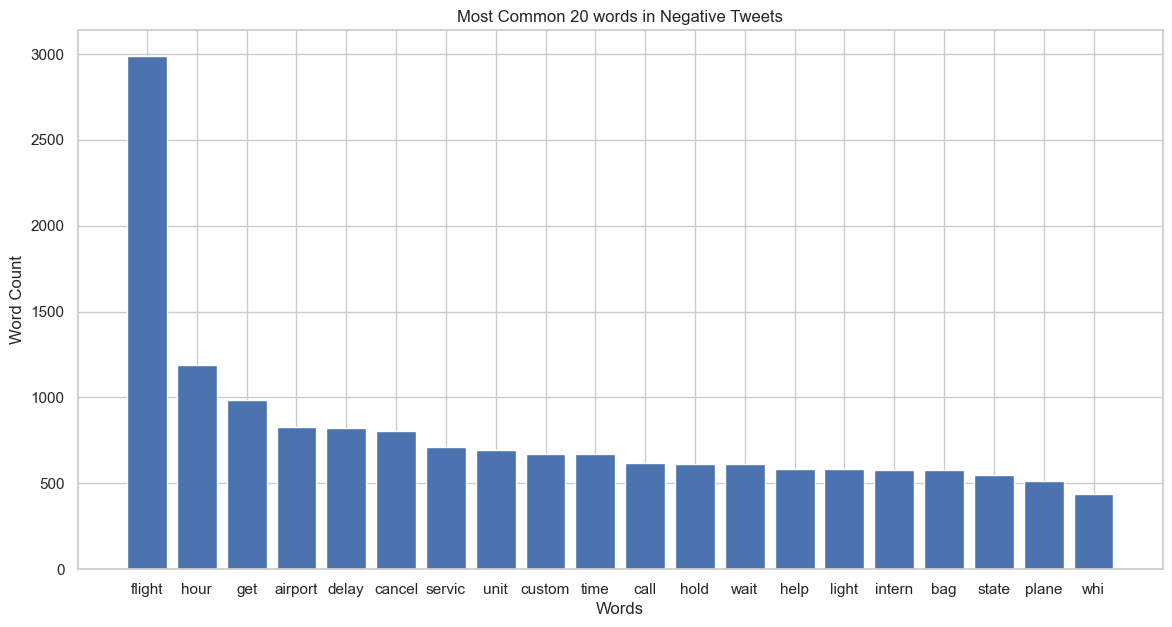

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
names = [i[0] for i in negative]
values = [i[1] for i in negative]

plt.figure(figsize=[14,7])
# plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
sns.set_theme(style="whitegrid")

plt.bar(range(len(negative)), values, tick_label=names)
plt.title("Most Common 20 words in Negative Tweets")
plt.ylabel("Word Count")
plt.xlabel("Words")
plt.show()

In [ ]:
k = dict(sorted(negative.items(),key=lambda x:x[1],reverse = True))

In [ ]:
k

In [46]:
from collections import Counter
positive = Counter(" ".join(data[data.airline_sentiment=="positive"]["updated_text"]).split()).most_common(20)

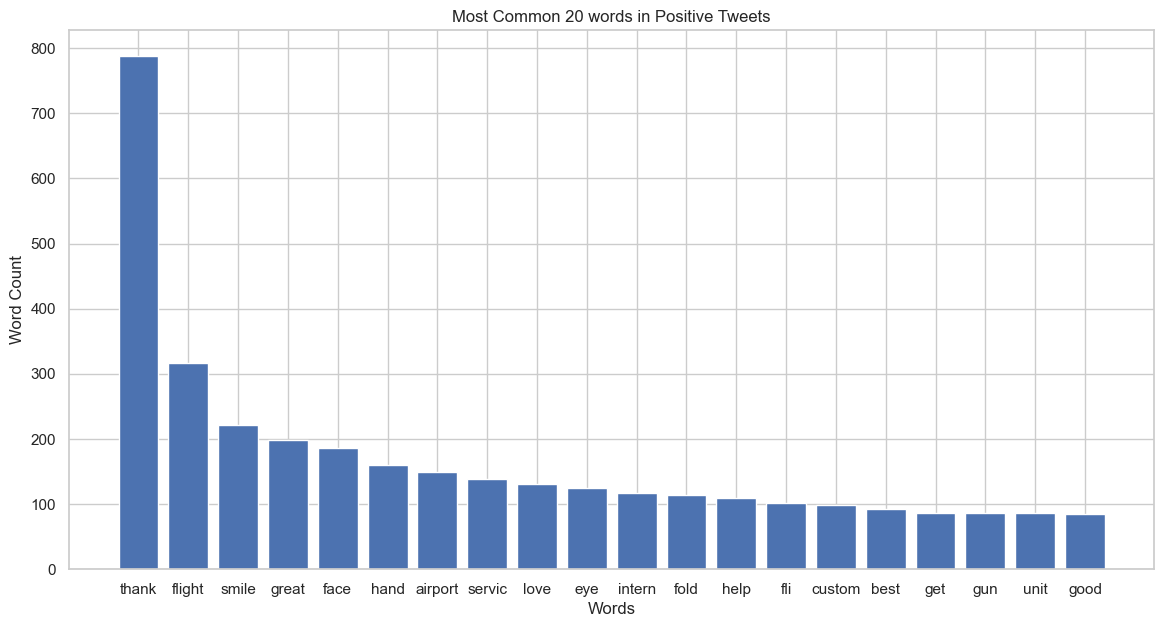

In [47]:
names = [i[0] for i in positive]
values = [i[1] for i in positive]

plt.figure(figsize=[14,7])
# plt.grid(color = 'grey', linestyle="--", linewidth = 0.5)
sns.set_theme(style="whitegrid")

plt.bar(range(len(positive)), values, tick_label=names)
plt.title("Most Common 20 words in Positive Tweets")
plt.ylabel("Word Count")
plt.xlabel("Words")
plt.show()

In [ ]:
y_pred_cv2_svc

In [ ]:
!pip install wordcloud

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
sentence = []

for i in negative:
    sentence.append(i)
    
text_ = " ".join(map(str, sentence)) 

wordcloud = WordCloud(width = 3000, 
                      height = 3000, 
                      max_font_size = 300, 
                      colormap = "twilight_shifted").generate(text_)

plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
con_df = data.copy()

In [ ]:
indexes =[]
c=1
for txt in X_test:
    if c==1:
        print(type(txt[0]))
    for dt in data.updated_text:
        if c==1:
            print(type(dt))
        c+=1
        if txt[0] == dt:
            indexes.append(data[data.updated_text == dt].index)            

In [ ]:
len(indexes)

In [ ]:
# Önce test setinin orijinal halini çağıralım:
actual_table = data.iloc[X_test.index] # burada target sütunu da var!
actual_table.reset_index(drop=True,inplace=True)
# Tahmin sütununu ekleyelim:
data = pd.concat([actual_table,pd.Series(y_pred_cv2_svc)],axis=1).rename(columns={0:"PRED"})
# # Fark sütunu
# data["Err"] = round(data["PRED"] - data["ATaxi_min"],1)
# # Mutlak Fark sütunu
# data["AbsErr"] = np.abs(data["Err"])
# data

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = mnb2.predict_proba(X_test_cv2)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test_0_1, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.title("Precision - Recall Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=12)
    plt.ylim([0, 1])

plt.figure(figsize=[14,7])
plot_precision_and_recall(precision, recall, threshold)

In [ ]:
from sklearn.metrics import auc
print("Area under Curve:", round(auc(recall,precision),2))

In [ ]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_0_1, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=4, label=label)
    plt.plot([0, 1], [0, 1], 'r')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.figure(figsize=[14,7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [ ]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_curve(y_test, test_probs)